## Market Stylized Facts 

### Volatility, Correlation and Co:

Volatility has represents a family of concepts related to uncertainty around the directions and deviations of underlying prices apart from being a general "undirected dispersion/risk measure"

- **Historical Volatility**: refers to the standard deviation of log returns of a financial time series. Given N post log returns:

$$r_n, \, n \in \{1, \dots, N\}$$ such that $$r_n \equiv \log S_n - \log S_{n-1}$$

and mean return:

$$\hat{\mu} = \frac{1}{N} \sum_{n=1}^{N}{r_n}$$

the historical volatility is found by:

$$ \hat{\sigma}^2 = \sqrt{\frac{1}{N-1} \sum_{n=1}^{N}{(r_n - \hat{\mu})^2}} $$


-**Instantaneous Volatility**: this refers to the volatility factor of a diffusion process, for example, the InstVol in the BSM is found using the stochastic differential equation of the BSM equation:
$$ dS_t = rS_tdt + \sigma S_t dZ_t $$

-**Implied Volatility**: the volatility derived from the BSM when the current observed market prices of vanilla options, suppose we observe a price $C_0$, implied is the volatility that provides that solution when plugged in:

$$C_0^* = C^{BSM}(S_0, K, T, r, \sigma^{implied})$$

Volatility refers to the standard deviation and variance refers to the squared quantity.

-**Skewness**: This is the measure of how the sample varies relative to the mean (more left or right). Again assume we have a financial time series with mean $\hat{\mu}$, the sample skewness is:

$$\hat{s} = \frac{\frac{1}{N} \sum_{n=1}^{N}{(r_n - \hat{\mu})^3}}{\left(\frac{1}{N} \sum_{n=1}^{N}{(r_n - \hat{\mu})^2}\right)^{\frac{3}{2}}} $$


-**Kurtosis**: Measures the peakedness of the distribution and the size of the tails of the distribution, fat tails = high kurtosis:

$$\hat{k} = \frac{\frac{1}{N}\sum_{n=1}^{N}{(r_n - \hat{\mu})^4}}{\left(\frac{1}{N} \sum_{n=1}^{N}{(r_n - \hat{\mu})^2}\right)^2} - 3 $$


-**Historical Correlation**: refers to a measure for the co-movement of financial instruments relative to eachother. Given two time series, $r_a, \,r_b$ with two different means, the historical correlation is:

$$ \hat{\rho} = \frac{\sum_{n=1}^{N}{(r^a_n - \hat{\mu^a})(r^b_n - \hat{\mu^b})}}{\sqrt{\sum_{n=1}^{N}{(r^a_n - \hat{\mu^a})^2} \sum_{n=1}^{N}{(r^b_n - \hat{\mu^b})^2}}} $$


-**Instantaneous Correlation**: Suppose given 2 standard brownian motions $Z^a, Z^b$, the instantaneous correlation $\rho$ between both is then given by $\langle Z^a, Z^b \rangle_t = \rho t$ where the angled brackets denotes the quadratic variation process.


### Normal Returns as the Benchmark Case

The basis of the Black-Scholes model is around assuming stocks follow a general geometric brownian motion model. This model uses the following Stochastic Differential Equation:

$$dS_t = r S_t dt + \sigma S_t dZ_t$$

A discrete solution can be easily simulated and it yields:

$$S_t = S_{t - \Delta t} e^{(r - \frac{\sigma^2}{2})\delta t + \sigma \sqrt{\Delta t} z_t)}$$

This discrete solution yields a possible random outcome with proper frequency of one path through the possible outcome. 

For times $t \in \{\Delta t, 2\Delta t, \dots, T\}$ and the $z_t$ being a standard normally distributed random variables. Lets parameterize this model with $S_0 = 100, \,T = 10.0, \, r = 0.05, \, \sigma = 0.2 using the following Python script to visualize the possible outcomes.

RETURN SAMPLE STATISTICS
---------------------------------------------
Mean of Daily  Log Returns -0.000195
Mean of Annua. Log Returns -0.049029
Std  of Annua. Log Returns  0.199044
---------------------------------------------
Skew of Sample Log Returns -0.116181
Skew Normal Test p-value    0.033881
---------------------------------------------
Kurt of Sample Log Returns  0.172408
Kurt Normal Test p-value    0.123456
---------------------------------------------
Normal Test p-value         0.032168
---------------------------------------------
Realized Volatility         0.199068
Realized Variance           0.039628


AttributeError: 'Rectangle' object has no property 'normed'

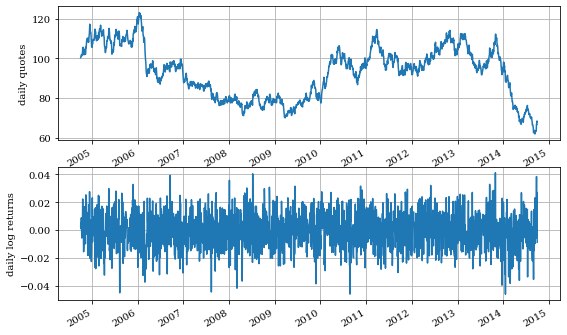

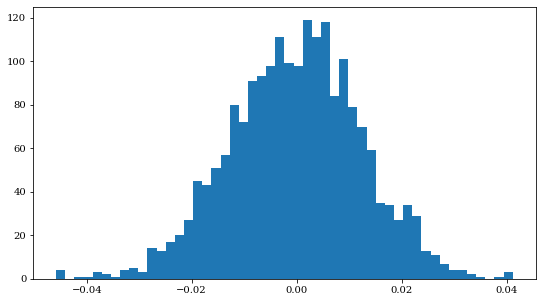

In [12]:
#
# Analyzing Returns from Geometric Brownian Motion
# 03_stf/GBM_returns.py
#
# (c) Dr. Yves J. Hilpisch
# Derivatives Analytics with Python
#
import math
import numpy as np
import pandas as pd
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'

#
# Helper Function
#


def dN(x, mu, sigma):
    ''' Probability density function of a normal random variable x.

    Parameters
    ==========
    mu : float
        expected value
    sigma : float
        standard deviation

    Returns
    =======
    pdf : float
        value of probability density function
    '''
    z = (x - mu) / sigma
    pdf = np.exp(-0.5 * z ** 2) / math.sqrt(2 * math.pi * sigma ** 2)
    return pdf


#
# Simulate a Number of Years of Daily Stock Quotes
#


def simulate_gbm():
    # model parameters
    S0 = 100.0  # initial index level
    T = 10.0  # time horizon
    r = 0.05  # risk-less short rate
    vol = 0.2  # instantaneous volatility
    mu = 0.05

    # simulation parameters
    np.random.seed()
    gbm_dates = pd.date_range(start='30-09-2004',
                                 end='30-09-2014',
                                 periods = 2000)
    M = len(gbm_dates)  # time steps
    I = 1  # index level paths
    dt = 1 / 252.  # fixed for simplicity
    df = math.exp(-r * dt)  # discount factor

    # stock price paths
    rand = np.random.standard_normal((M, I))  # random numbers
    S = np.zeros_like(rand)  # stock matrix
    S[0] = S0  # initial values
    for t in range(1, M):  # stock price paths
        S[t] = S[t - 1] * np.exp((mu + r - vol ** 2 / 2) * dt +
                                 vol * rand[t] * math.sqrt(dt))

    gbm = pd.DataFrame(S[:, 0], index=gbm_dates, columns=['index'])
    gbm['returns'] = np.log(gbm['index'] / gbm['index'].shift(1))

    # Realized Volatility (eg. as defined for variance swaps)
    gbm['rea_var'] = 252 * np.cumsum(gbm['returns'] ** 2) / np.arange(len(gbm))
    gbm['rea_vol'] = np.sqrt(gbm['rea_var'])
    gbm = gbm.dropna()
    return gbm

# Return Sample Statistics and Normality Tests


def print_statistics(data):
    print("RETURN SAMPLE STATISTICS")
    print("---------------------------------------------")
    print("Mean of Daily  Log Returns %9.6f" % np.mean(data['returns']))
    print("Mean of Annua. Log Returns %9.6f" %
          (np.mean(data['returns']) * 252))
    print("Std  of Annua. Log Returns %9.6f" %
          (np.std(data['returns']) * math.sqrt(252)))
    print("---------------------------------------------")
    print("Skew of Sample Log Returns %9.6f" % scs.skew(data['returns']))
    print("Skew Normal Test p-value   %9.6f" %
          scs.skewtest(data['returns'])[1])
    print("---------------------------------------------")
    print("Kurt of Sample Log Returns %9.6f" % scs.kurtosis(data['returns']))
    print("Kurt Normal Test p-value   %9.6f" %
          scs.kurtosistest(data['returns'])[1])
    print("---------------------------------------------")
    print("Normal Test p-value        %9.6f" %
          scs.normaltest(data['returns'])[1])
    print("---------------------------------------------")
    print("Realized Volatility        %9.6f" % data['rea_vol'].iloc[-1])
    print("Realized Variance          %9.6f" % data['rea_var'].iloc[-1])

#
# Graphical Output
#

# daily quotes and log returns


def quotes_returns(data):
    ''' Plots quotes and returns. '''
    plt.figure(figsize=(9, 6))
    plt.subplot(211)
    data['index'].plot()
    plt.ylabel('daily quotes')
    plt.grid(True)
    plt.axis('tight')

    plt.subplot(212)
    data['returns'].plot()
    plt.ylabel('daily log returns')
    plt.grid(True)
    plt.axis('tight')

# histogram of annualized daily log returns


def return_histogram(data):
    ''' Plots a histogram of the returns. '''
    plt.figure(figsize=(9, 5))
    x = np.linspace(min(data['returns']), max(data['returns']), 100)
    y = dN(x, np.mean(data['returns']), np.std(data['returns']))
    plt.hist(np.array(data['returns']), bins=50, normed=True)
    plt.plot(x, y, linewidth=2)
    plt.xlabel('log returns')
    plt.ylabel('frequency/probability')
    plt.grid(True)

# Q-Q plot of annualized daily log returns


def return_qqplot(data):
    ''' Generates a Q-Q plot of the returns.'''
    plt.figure(figsize=(9, 5))
    sm.qqplot(data['returns'], line='s')
    plt.grid(True)
    plt.xlabel('theoretical quantiles')
    plt.ylabel('sample quantiles')


# realized volatility
def realized_volatility(data):
    ''' Plots the realized volatility. '''
    plt.figure(figsize=(9, 5))
    data['rea_vol'].plot()
    plt.ylabel('realized volatility')
    plt.grid(True)

# mean return, volatility and correlation (252 days moving = 1 year)


def rolling_statistics(data):
    ''' Calculates and plots rolling statistics (mean, std, correlation). '''
    plt.figure(figsize=(11, 8))

    plt.subplot(311)
    mr = data['returns'].rolling(252).mean() * 252
    mr.plot()
    plt.grid(True)
    plt.ylabel('returns (252d)')
    plt.axhline(mr.mean(), color='r', ls='dashed', lw=1.5)

    plt.subplot(312)
    vo = data['returns'].rolling(252).std() * math.sqrt(252)
    vo.plot()
    plt.grid(True)
    plt.ylabel('volatility (252d)')
    plt.axhline(vo.mean(), color='r', ls='dashed', lw=1.5)
    vx = plt.axis()

    plt.subplot(313)
    co = mr.rolling(252).corr(vo)
    co.plot()
    plt.grid(True)
    plt.ylabel('correlation with volatility (252d)')
    cx = plt.axis()
    plt.axis([vx[0], vx[1], cx[2], cx[3]])
    plt.axhline(co.mean(), color='r', ls='dashed', lw=1.5)

def main():
    data = simulate_gbm()
    print_statistics(data)
    quotes_returns(data)
    #return_histogram(data)
    return_qqplot(data)
    realized_volatility(data)
    rolling_statistics(data)
    
main()

### Indices and Stocks 

The stylized facts of market instruments:

"A set of *statistical* properties, common across many instruments, markets and time periods, have been observed by independent studies and classified as 'stylized facts'. "

These facts must be compared to the outcomes and results of the benchmark BSM where volatility is constant and returns are normally distributed. These facts are:

   - **stochastic volatility**: voltility is neither constact nor deterministic. There is no mechanism to forecast volatility at a high confidence levebl 
    
   - **volatility clustering**: empirical data suggests that high volatility events seem to cluster in time; there is often a postiive autocorrelation of volatility measures. 
    
   - **volatility mean reversion**: it never goes to zero nor hits infinity, always regresses to the mean but the mean may shift. 
    
   - **leverage effect**: volatility and expected returns are often inversely correlated. Return measures increasing generally means voltility decreading. 
    
   - **fat tails**: compared to a normal distribution large positive and negative  index returns are more frequent.
    
   - **jumps**: index levels may move by magnitudes that cannot be explained within a Gaussian, some jump components may be necessary to explain some moves.
    
### DAX Index Returns

In this subsection we will show some of these styized facts through analysis of the ln returns of the DAX index over the period of October 2004 to September 2014

RETURN SAMPLE STATISTICS
---------------------------------------------
Mean of Daily  Log Returns  0.000254
Mean of Annua. Log Returns  0.063987
Std  of Annua. Log Returns  0.218582
---------------------------------------------
Skew of Sample Log Returns  0.036871
Skew Normal Test p-value    0.449487
---------------------------------------------
Kurt of Sample Log Returns  7.300400
Kurt Normal Test p-value    0.000000
---------------------------------------------
Normal Test p-value         0.000000
---------------------------------------------
Realized Volatility         0.214515
Realized Variance           0.046017
Rolling Statistics


/Users/philipwallace/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


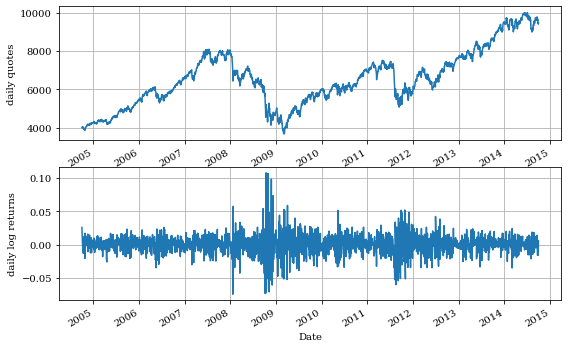

<Figure size 648x360 with 0 Axes>

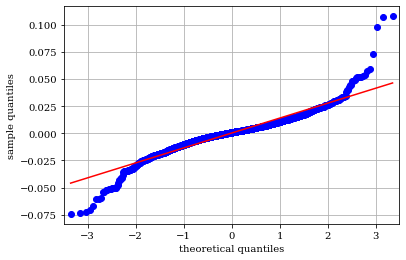

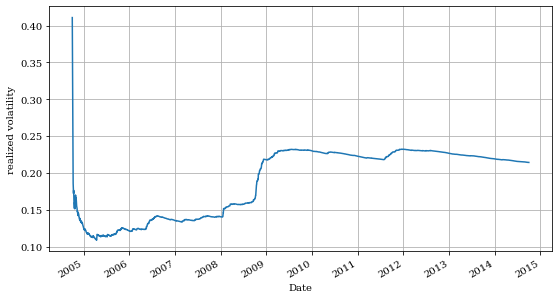

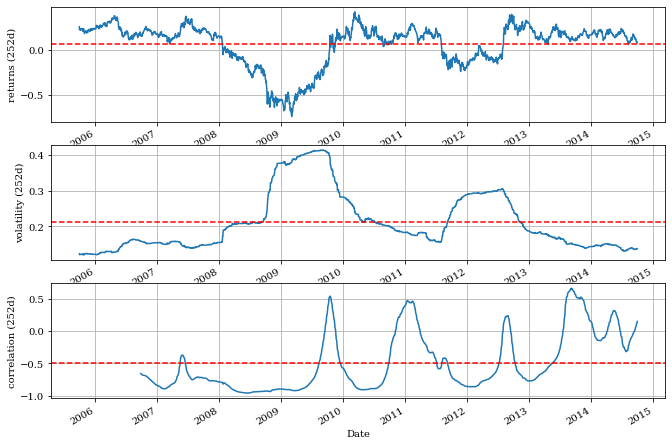

In [14]:
#
# Analyzing DAX Index Quotes and Returns
# Source: http://finance.yahoo.com
# 03_stf/DAX_returns.py
#
# (c) Dr. Yves J. Hilpisch
# Derivatives Analytics with Python
#
from GBM_returns import * 

# Read Data for DAX from the Web


def read_dax_data():
    ''' Reads historical DAX data from Yahoo! Finance, calculates log returns,
    realized variance and volatility.'''
    DAX = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data_long.csv',
                      index_col=0, parse_dates=True)['.GDAXI']
    DAX = pd.DataFrame(DAX)
    DAX = DAX.loc['2004-09-30':'2014-09-30']
    DAX.rename(columns={'.GDAXI': 'index'}, inplace=True)
    DAX['returns'] = np.log(DAX['index'] / DAX['index'].shift(1))
    DAX['rea_var'] = 252 * np.cumsum(DAX['returns'] ** 2) / np.arange(len(DAX))
    DAX['rea_vol'] = np.sqrt(DAX['rea_var'])
    DAX = DAX.dropna()
    return DAX


def count_jumps(data, value):
    ''' Counts the number of return jumps as defined in size by value. '''
    jumps = np.sum(np.abs(data['returns']) > value)
    return jumps

def main():
    data = read_dax_data()
    print_statistics(data)
    quotes_returns(data)
    #return_histogram(data)
    return_qqplot(data)
    realized_volatility(data)
    print("Rolling Statistics")
    rolling_statistics(data)
    
main()

In observing the outputs of this analysis, all the market stylized facts can be observed. 

In the rolling returns chart, the mean return can be seen to be constantly fluctuating up and down around the mean return of the whole period. There also appears to be volatility clustering around the 2009 period with a sustained high vol period.

In looking at the histogram, the actual returns have both fatter tails and a higher peak than what would be predicted by a normal distribution with the observed parameters of the index. The QQ-plot additionall is roughly normal in the intermediate values yet begins to heavily deviate above expectation on the tails around z-scores of +/- 3.

The DAX index also generates an annualized return of about 6% and a realized volatility of 21.8%. This coupled with a Kurtosis of 7.3 and a Kurt P-Value of functionally zero allows the confortable rejection of the null hypothesis that the distribution is normal -- and has very fat tails.

The realized volatility over time is generallly converging to some value and then jumps and begins to converge to another value. It drops and rises again showing that volatility does vary with time even over a longer lookback period such as a 14 year period.

The rolling volatility shows this aswell, as it fluctuates aggressively  from 10% to 40% during the 2008 financial crisis. Yet still reverts to some mean value.

The rolling correlation plot again shows the pattern as expected in the market stylized facts. Volatility had strong correlation with negative returns, with it hitting high negative values consistently and having a negative avergage across the whole period.

For jumps lets take a large return, +/- 5% in one day and compare it to what would appear in expectation:

In [32]:
#Define a jump as a +/- 5% daily ln return:
from scipy.stats import norm

data = read_dax_data()

jumps = data[data.returns.apply(abs) > 0.05].returns.count()

print('We observe ' + str(jumps) + ' such jumps in the DAX returns')

mean_rets = data.returns.mean()
mean_vol = np.sqrt(data.rea_var.mean())
z_up = -(0.05 - mean_rets)/ (mean_vol/ np.sqrt(252))
z_down = (-0.05 - mean_rets)/ (mean_vol/ np.sqrt(252))

expect_up = round(data.returns.count() * norm.cdf(z_up), 4)
expect_down = round(data.returns.count() * norm.cdf(z_down), 4)

print('Yet, if the DAX was normally distributed we would expect ' + str(expect_up+expect_down) + ' such returns over the same period' )


We observe 32 such jumps in the DAX returns
Yet if the DAX was normally distributed we would expect 0.1124 such returns over the same period


This over representation of larger returns again provides evidence of the existence of jumps that are not priced in to the normal distribution that add to the existence of fat tails in distributions.

In conclusion, if we were to want to model the DAX realistically, we would need to include:

    1. autocorrelated stochastic volatility 
    2. mean reversion of volatility 
    3. leverage effect -- negative correlation betweeen returns and volatility 
    4. fat tails and jumps in the index returns 
    
See - Cf. Klossner for a more formal integration of jumps into financial modelling wrt to a jump diffusion model 